<a href="https://colab.research.google.com/github/GabrieleGioetto/BankMMLProject/blob/master/Gioetto_Gabriele_MML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ## Input variables:

   bank client data:
   
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
 
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
   related with the last contact of the current campaign:
 
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - day: last contact day of the month (numeric)
 
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)
   other attributes:
 
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
 
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
 
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
!mkdir charts


mkdir: cannot create directory ‘charts’: File exists


In [ ]:
import pandas as pd

Import data 

In [ ]:
url = "https://raw.githubusercontent.com/GabrieleGioetto/BankMMLProject/master/bank-full.csv"

df1 = pd.read_csv(url, sep=";")

df_info = df1.info()

print(df_info)

print(df1.nunique(axis=0))
print(df1.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f'))))


df1["y"] =  df1["y"].map(lambda x: 0 if x == "no" else 1)

X = df1.drop('y', axis=1)

y = df1[["y"]]

# df1["y"] = 0 if df1["y"] == "no" else 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age            77
job            12
marital         3
education       4
default         2
bala

Show that the problem is imbalanced

[39922  5289]


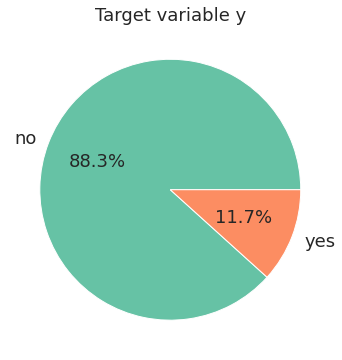

In [ ]:
# y imbalance
from matplotlib import pyplot as plt
import numpy as np

data = y.values.flatten()
pie, ax = plt.subplots(figsize=[10,6])

data = (np.array(np.unique(data, return_counts=True)).T)[:,1]
labels = ["no","yes"]

print(data)



plt.pie(x=data, autopct="%.1f%%",  labels=labels, textprops={'fontsize': 18})
plt.title("Target variable y", fontsize=18);
plt.show()
pie.savefig("charts/pieChartY.png", bbox_inches='tight')


Creazione barplot per categorical features, normalizzati per y

         age  counts
0    (0, 10]       0
1   (10, 20]      97
2   (20, 30]    6933
3   (30, 40]   17687
4   (40, 50]   11239
5   (50, 60]    8067
6   (60, 70]     701
7   (70, 80]     388
8   (80, 90]      92
9  (90, 100]       7


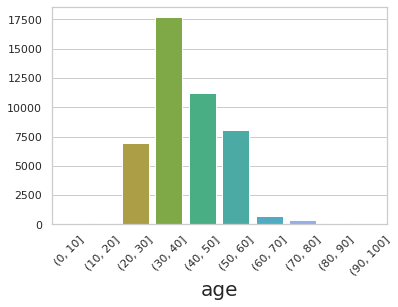

In [ ]:
# AGE
from matplotlib import pyplot as plt
import seaborn as sns

bins=list(range(0,101,10))

age_count = pd.cut(X['age'],bins=bins).value_counts(sort=False).rename_axis(["age"]).reset_index(name='counts')

print(age_count)
# age_count.plot(kind='bar', title="Age")
plt.xticks(rotation=45)
ax = sns.barplot(x="age", y="counts", data=age_count)
ax.set_xlabel("age",fontsize=20);
ax.set_ylabel("",fontsize=20);

plt.savefig(f"charts/job_countplot.png", bbox_inches='tight')
plt.show()


39922
5289
    marital  y     counts
0  divorced  0  11.484896
1  divorced  1  11.760257
2   married  0  61.266971
3   married  1  52.089242
4    single  0  27.248134
5    single  1  36.150501


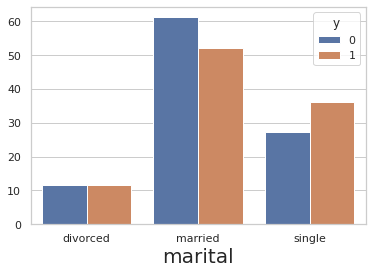

   education  y     counts
0    primary  0  15.680577
1    primary  1  11.174135
2  secondary  0  51.981364
3  secondary  1  46.322556
4   tertiary  0  28.317720
5   tertiary  1  37.738703
6    unknown  0   4.020340
7    unknown  1   4.764606


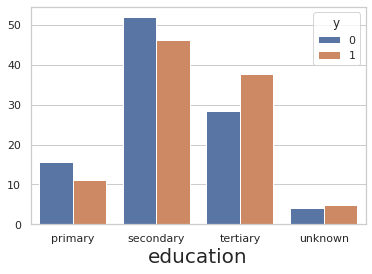

  default  y     counts
0      no  0  98.088773
1      no  1  99.016827
2     yes  0   1.911227
3     yes  1   0.983173


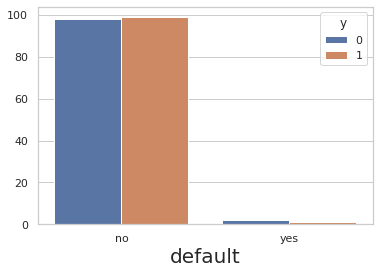

  housing  y     counts
0      no  0  41.899203
1      no  1  63.414634
2     yes  0  58.100797
3     yes  1  36.585366


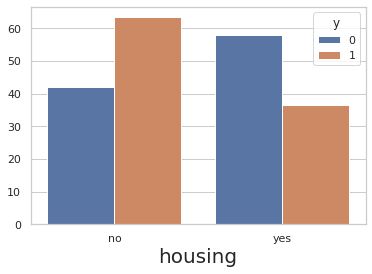

  loan  y     counts
0   no  0  83.066981
1   no  1  90.848932
2  yes  0  16.933019
3  yes  1   9.151068


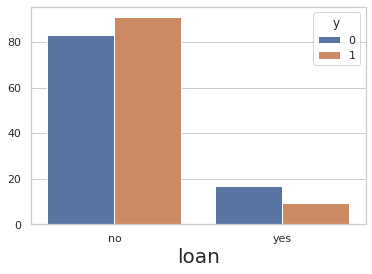

     contact  y     counts
0   cellular  0  62.411703
1   cellular  1  82.605407
2  telephone  0   6.302289
3  telephone  1   7.373795
4    unknown  0  31.286008
5    unknown  1  10.020798


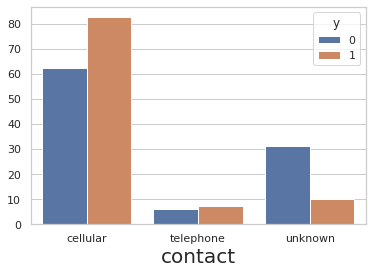

  poutcome  y     counts
0  failure  0  10.728420
1  failure  1  11.684628
2    other  0   3.839988
3    other  1   5.804500
4  success  1  18.491208
5  success  0   1.335103
6  unknown  0  84.096488
7  unknown  1  64.019663


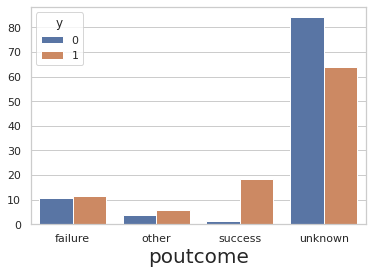

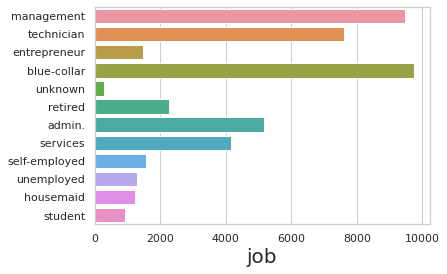

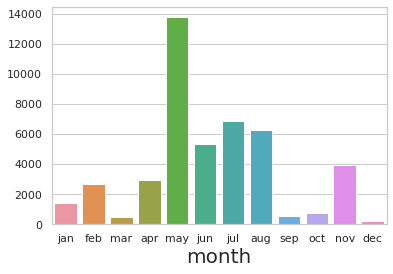

In [ ]:
# Categorical values
import seaborn as sns


columns_categorical = ["marital","education","default","housing","loan","contact","poutcome"]
sns.set_theme(style="whitegrid")

# month
# job

data = X.copy()
data["y"] = y[:]



count_y_zero = (data["y"] == 0).sum()
count_y_one = (data["y"] == 1).sum()

print((data["y"] == 0).sum())
print((data["y"] == 1).sum())

data_counts = data.copy()

for column_name in columns_categorical:
  x = column_name

  data_counts = data.groupby(x)["y"].value_counts()
  data_counts = data_counts.rename_axis([column_name, "y"]).reset_index(name='counts')
  data_counts.loc[data_counts["y"] == 0, "counts"] = (data_counts.loc[data_counts["y"] == 0, "counts"] / count_y_zero) * 100
  data_counts.loc[data_counts["y"] == 1, "counts"] = (data_counts.loc[data_counts["y"] == 1, "counts"] / count_y_one) * 100
  print(data_counts)

  ax = sns.barplot(x=column_name, y="counts", hue="y", data=data_counts)
  ax.set_xlabel(column_name,fontsize=20);
  ax.set_ylabel("",fontsize=20);

  plt.savefig(f"charts/{column_name}_countplot.png", bbox_inches='tight')
  plt.show()

del data_counts

ax = sns.countplot(y="job", data=data)
ax.set_xlabel("job",fontsize=20);
ax.set_ylabel("",fontsize=20);

plt.savefig(f"charts/job_countplot.png")
plt.show()



ax = sns.countplot(x="month", data=X, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
ax.set_xlabel("month",fontsize=20);
ax.set_ylabel("",fontsize=20);

plt.savefig(f"charts/month_countplot.png")
plt.show()



In [ ]:
# Balance

print(X["balance"].value_counts(sort=False))

 0        3514
-32         15
 32         31
 2081        5
 4130        2
          ... 
 2015        8
 12282       1
 6141        1
 4094        1
 2047        8
Name: balance, Length: 7168, dtype: int64


Creazione violin plots per numerical features

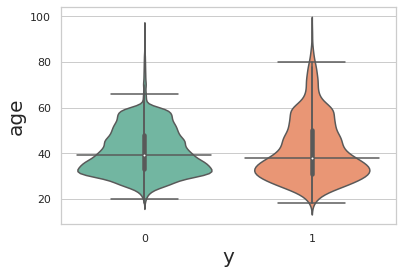

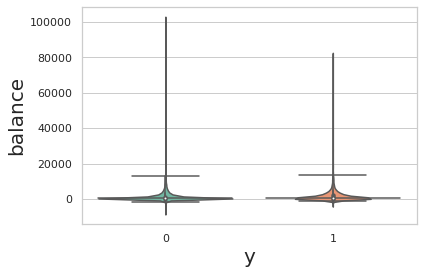

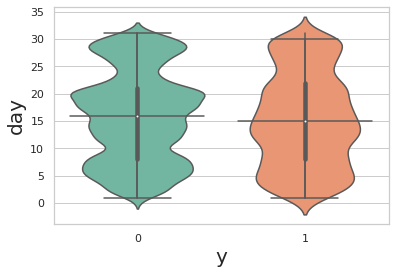

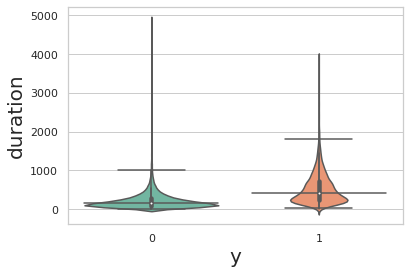

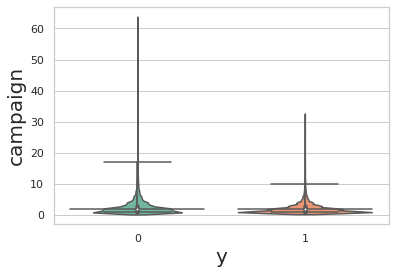

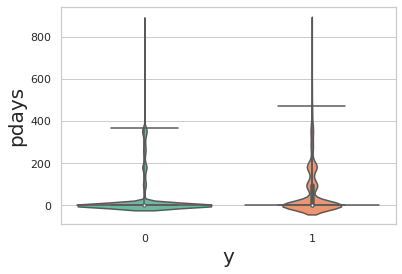

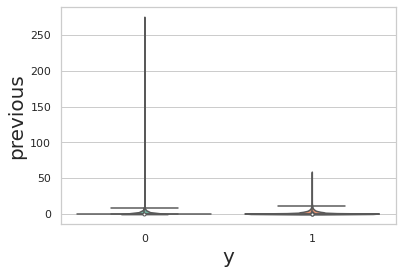

In [ ]:
import seaborn as sns

columns_int = ["age","balance","day","duration","campaign","pdays","previous"]

sns.set_theme(style="whitegrid")
sns.set_palette("Set2")




for column_name in columns_int:
  fig, ax = plt.subplots()
  ax.set_xlabel("y",fontsize=20);
  ax.set_ylabel(column_name,fontsize=20);
  sns.boxplot(y=df1[column_name], x=df1["y"], showfliers=False, showbox=False, whis=[0.1,99])
  sns.violinplot(y=df1[column_name], x=df1["y"])

  plt.savefig(f"charts/{column_name}_boxplot.png", bbox_inches='tight')
  plt.show()


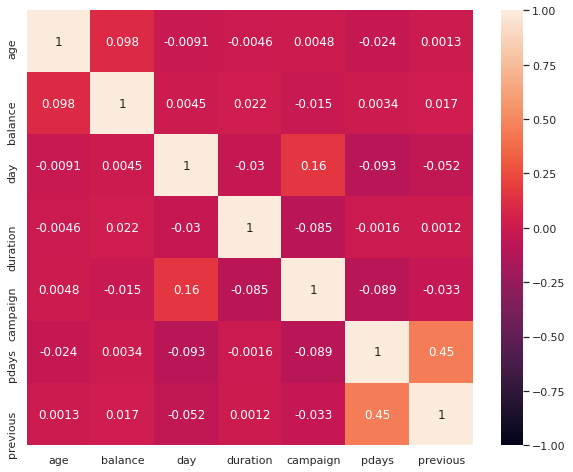

In [ ]:
# Correlational heatmap
import seaborn as sns

plt.figure(figsize=(10,8)) 
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig("charts/corr_map.png", bbox_inches='tight')


Training test split


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)


Outliers management

In [ ]:
# Droppo outliers ( > 99.9 percentile )
import numpy as np

columns_int = ["balance","duration","campaign","pdays","previous"]

print(f"Len X: {len(X)}")

percentiles_99_9 = {}
for column_name in columns_int:
  percentiles_99_9[column_name] = np.percentile(X_train[column_name], 99.9)
  print(f"{column_name} percentile 99.9: {percentiles_99_9[column_name]}")


for column_name in columns_int:
  print(f"Record rimossi per colonna {column_name} : {len(X_train[ X_train[column_name] > percentiles_99_9[column_name]])}")
  mask = X_train[column_name] < percentiles_99_9[column_name]
  X_train = X_train[ mask ]
  y_train = y_train[ mask ]

print("\n\n")
print(f"Len X: {len(X_train)}")


Len X: 45211
balance percentile 99.9: 32948.0
duration percentile 99.9: 2187.372000000003
campaign percentile 99.9: 32.0
pdays percentile 99.9: 657.0230000000083
previous percentile 99.9: 22.0
Record rimossi per colonna balance : 33
Record rimossi per colonna duration : 34
Record rimossi per colonna campaign : 31
Record rimossi per colonna pdays : 34
Record rimossi per colonna previous : 32



Len X: 33734


In [ ]:
# Class imbalance (SMOTE-NC)
from imblearn.over_sampling import SMOTENC

print(len(X_train))
print(len(y_train))

print((y_train == 0).sum())
print((y_train == 1).sum())

categorical_features = [1,2,3,4,6,7,8,10,15]

columns = X_train.columns

oversample = SMOTENC(random_state=22, categorical_features=categorical_features)
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(len(X))
print(len(y))

X_train = pd.DataFrame(data=X_train, columns=columns)




33734
33734
y    29827
dtype: int64
y    3907
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


45211
45211


In [ ]:
# Check if unique values in train and test are equals for categorical data

columns_categorical = ["job","marital","education","default","housing","loan","contact","month","poutcome"]

for column_name in columns_categorical:
  print(X_train[column_name].unique().sort() == X_test[column_name].unique().sort())

# Same values, we can apply get dummies for train and data without problem


True
True
True
True
True
True
True
True
True


One hot encoding

In [ ]:
import pandas as pd

columns_categorical = ["job","marital","education","default","housing","loan","contact","month","poutcome"]


X_train = pd.get_dummies(X_train, columns=columns_categorical, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columns_categorical, drop_first=True)


X_train = X_train.rename(columns={"job_blue-collar": "job_blue_collar","job_self-employed":"job_self_employed"})
X_test = X_test.rename(columns={"job_blue-collar": "job_blue_collar","job_self-employed":"job_self_employed"})




In [ ]:
# Correlazioni con one hot 

corr_matrix = X_train.corr()

columns = corr_matrix.columns

for i,row in enumerate(corr_matrix):
  for j in range(i+1, len(columns)):
    # if row != column and abs(corr_matrix[row][column]) > 0.5:
    #   print(i,j, str(corr_matrix[row][column]))
    if abs(corr_matrix[row][columns[j]]) > 0.9:
      print(row,columns[j], str(corr_matrix[row][columns[j]]))

In [ ]:
print(X_train.columns)

print(X_train.sum(axis=0))

# ci sono abbastanza dati per i dati encodati

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')
age                    2.454008e+06
balance                8.958294e+07
day                    9.260602e+05
duration               2.237334e+07
campaign               1.480109e+05
pdays                  2.981217e+06
previous               4.717962e+04
job_blu

In [ ]:
# Change type of some columns ( They are type object and this creates errors in regression methods )

X_train[["age","balance","day","duration","campaign","pdays","previous"]] = X_train[["age","balance","day","duration","campaign","pdays","previous"]].astype("float32")

X_test[["age","balance","day","duration","campaign","pdays","previous"]] = X_test[["age","balance","day","duration","campaign","pdays","previous"]].astype("float32")



## Feature Selection

In [ ]:
# Feature selection iterative model
import statsmodels.api as sm
from statsmodels.formula.api import ols

# print(X_train)
# print(y_train)

remaining_features = list(X_train.columns)

data = X_train.copy()
data["y"] = y_train[:]

print(remaining_features)

alpha = 0.025

# provo tutte le colonne e se il p value è minore di 0.05 aggiungo a una lista, poi prendo la colonna con il p-value minore
# e la aggiungo al mio modello. Poi riparto con il mio modello aggiornato

selected_features_forward = []
while remaining_features: 
  PF = []  #list of (P value, feature)
  print(f"SELECTED FEATURES: {selected_features_forward}")
  for f in remaining_features:
    temp = selected_features_forward + [f]  #temporary list of features+

    log_reg = sm.Logit(y_train, X_train[temp]).fit()

    p_values = log_reg.pvalues
    min_p_value = np.min(log_reg.pvalues)

    if min_p_value < alpha:
       PF.append((min_p_value,f))
  if PF:  #if not empty
     PF.sort(reverse=True)
     (best_pval, best_f) = PF.pop()
     remaining_features.remove(best_f)
     print('selected feature {} with p-value = {:.2E}'.
            format(best_f, best_pval))
     selected_features_forward.append(best_f)
  else:
     break

print("---------------------------------------------------")
print(selected_features_forward)
print(data)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self_employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
SELECTED FEATURES: []
Optimization terminated successfully.
         Current function value: 0.693124
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.690035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692953
         Iterations 3
Optimization terminated

In [ ]:

# backward elimination with logistic regression
import statsmodels.api as sm
import numpy as np

alpha = 0.05

X_train_fs_b = X_train.copy()

print(X_train_fs_b.info())


continua = True

while continua:
  log_reg = sm.Logit(y_train, X_train_fs_b).fit()

  p_values = log_reg.pvalues
  max_p_value = np.max(log_reg.pvalues)

  if max_p_value > alpha:
    column_to_remove = log_reg.pvalues.index[np.argmax(log_reg.pvalues)]
    X_train_fs_b = X_train_fs_b.drop(column_to_remove, axis=1)
    print("Removed " + column_to_remove + " with p-value: " + str(max_p_value))
  else:  
    continua=False

print(X_train_fs_b.columns)

selected_features_back = list(X_train_fs_b.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59654 entries, 0 to 59653
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  59654 non-null  float32
 1   balance              59654 non-null  float32
 2   day                  59654 non-null  float32
 3   duration             59654 non-null  float32
 4   campaign             59654 non-null  float32
 5   pdays                59654 non-null  float32
 6   previous             59654 non-null  float32
 7   job_blue_collar      59654 non-null  uint8  
 8   job_entrepreneur     59654 non-null  uint8  
 9   job_housemaid        59654 non-null  uint8  
 10  job_management       59654 non-null  uint8  
 11  job_retired          59654 non-null  uint8  
 12  job_self_employed    59654 non-null  uint8  
 13  job_services         59654 non-null  uint8  
 14  job_student          59654 non-null  uint8  
 15  job_technician       59654 non-null 

In [ ]:
print(f"elementi totali: {len(X_train.columns)}")

print(f"elementi comuni: {len(list(set(selected_features_forward).intersection(selected_features_back)))}")

print(f"elementi totali forward: {len(selected_features_forward)}")
print(f"elementi totali back: {len(selected_features_back)}")

print(f"elementi eliminati da X originale backtrack {set(list(X_train.columns)) - set(list(selected_features_back))}")
print(f"elementi eliminati da X originale forward {set(list(X_train.columns)) - set(list(selected_features_forward))}")




elementi totali: 42
elementi comuni: 39
elementi totali forward: 42
elementi totali back: 39
elementi eliminati da X originale backtrack {'balance', 'poutcome_unknown', 'job_unknown'}
elementi eliminati da X originale forward set()


Creazione immagine KNN 2d

(59654, 39)
59654
(59654, 2)
59654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


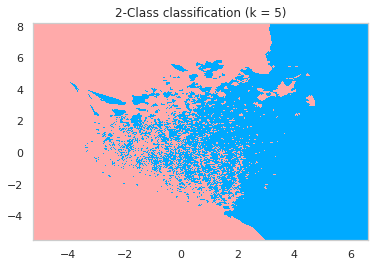

In [ ]:
%%script false
# PCA 2-dimension graph
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_sf = X_train[selected_features_back].copy()
y_sf = np.array(y_train)[np.newaxis].T

print(X_sf.shape)
print(len(y_sf))

h = 0.005

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

sc = StandardScaler()
sc.fit(X_sf)

X_train_std = sc.transform(X_sf)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

print(X_train_pca.shape)
print(len(y_sf))


n_neighbors = 5

clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train_pca, y_sf)

# calculate min, max and limits
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))
plt.savefig("charts/knnGraphColors.png" , bbox_inches='tight')
plt.show()


## PCA

(59654, 39)
59654
(59654, 29)


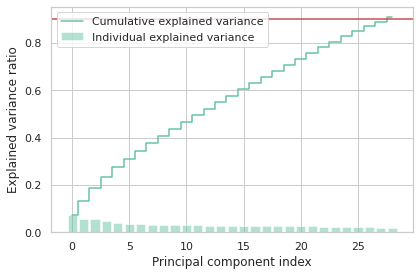

In [ ]:
# PCA ( e standard scale ) dopo feature selection with backward

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X_sf = X_train[selected_features_back].copy()
y_sf = np.array(y_train)[np.newaxis].T

X_sf_test = X_test[selected_features_back].copy()

print(X_sf.shape)
print(len(y_sf))

sc = StandardScaler()
sc.fit(X_sf)

X_train_std = sc.transform(X_sf)
X_test_std = sc.transform(X_sf_test)

pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

exp_var_pca = pca.explained_variance_ratio_

print(X_train_pca.shape)

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("charts/pcaRatio.png" , bbox_inches='tight')
plt.show()


In [ ]:
print(X_train_pca.shape)

print(cum_sum_eigenvalues)

n_90 = 29

(59654, 29)
[0.07258266 0.1302624  0.18672936 0.23399964 0.27403164 0.31021184
 0.34349576 0.37539834 0.40662462 0.43688932 0.46590185 0.49479088
 0.52250296 0.5497242  0.5767275  0.60352916 0.63007605 0.65605503
 0.6819618  0.70773643 0.7329242  0.75754845 0.7820332  0.8053153
 0.82791483 0.84971225 0.8708275  0.88965434 0.90768087]


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=10, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]


In [ ]:
# Classification with PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle


models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    # "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier(),
}

params = {
    "LogisticRegression" : { "max_iter": [200]},
    "RandomForestClassifier": { "min_samples_split": [2], "n_estimators":[100] },
    # "LinearDiscriminantAnalysis" : { "solver":["svd" , "eigen"], "n_components":[1]},
"KNeighborsClassifier" : { "p": [2], "n_neighbors": [5]}
}

# X_sf = X[selected_features_forward].copy()
# y_sf = np.array(y)[np.newaxis].T

X_train_pca = pd.DataFrame(data=X_train_pca)
y_train_pca = np.array(y_train)[np.newaxis].T

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train_pca, y_train_pca, scoring='f1', cv=5, n_jobs=3)

helper_score_summary = helper.score_summary(sort_by='mean_score')

for column in helper_score_summary:
  if column != "estimator":
    print(helper_score_summary[["estimator",column]])
    print("\n\n")

Running GridSearchCV for KNeighborsClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  2.9min remaining:  4.3min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  2.9min remaining:  1.9min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.8min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:    1.1s remaining:    0.8s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


KNeighborsClassifier
LogisticRegression
RandomForestClassifier
                estimator min_score
2  RandomForestClassifier  0.775232
0    KNeighborsClassifier  0.773744
1      LogisticRegression  0.809051



                estimator mean_score
2  RandomForestClassifier   0.908703
0    KNeighborsClassifier   0.896587
1      LogisticRegression   0.875381



                estimator max_score
2  RandomForestClassifier  0.943595
0    KNeighborsClassifier  0.931018
1      LogisticRegression  0.894858



                estimator  std_score
2  RandomForestClassifier  0.0667744
0    KNeighborsClassifier  0.0614747
1      LogisticRegression   0.033218



                estimator n_neighbors
2  RandomForestClassifier         NaN
0    KNeighborsClassifier           5
1      LogisticRegression         NaN



                estimator    p
2  RandomForestClassifier  NaN
0    KNeighborsClassifier    2
1      LogisticRegression  NaN



                estimator max_iter
2  RandomForestClassifie

[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
# Confusion Matrix with PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(helper.grid_searches)

confusion_matrix_result = {}

best_classifiers = {}

best_classifiers["KNeighborsClassifier"] = KNeighborsClassifier(**helper.grid_searches["KNeighborsClassifier"].best_params_)
best_classifiers["LogisticRegression"] = LogisticRegression(**helper.grid_searches["LogisticRegression"].best_params_)
best_classifiers["RandomForestClassifier"] = RandomForestClassifier(**helper.grid_searches["RandomForestClassifier"].best_params_)

for key in best_classifiers:
  clf = best_classifiers[key].fit(X_train_pca, y_train_pca)
  y_test_pred = clf.predict(X_test_pca)

  print(f"CLASSIFIER: {key}")
  confusion_matrix_result[key] = confusion_matrix(y_test, y_test_pred)
  print(confusion_matrix_result[key])
  print(f"Accuracy score: {accuracy_score(y_test,y_test_pred)}")
  print(f"Precision score: {precision_score(y_test,y_test_pred)}")
  print(f"Recall score: {recall_score(y_test,y_test_pred)}")
  print(f"F1 score: {f1_score(y_test,y_test_pred)}")

  print("------------------------------------------------")


# y_pred = helper.grid_searches[key].best_estimator_.predict(X_sf)

# confusion_matrix[key] = confusion_matrix(y, y_pred)
# print(confusion_matrix[key])


{'KNeighborsClassifier': GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid={'n_neighbors': [5], 'p': [2]}, pre_dispatch='2*n_jobs',
             refit=False, return_train_score=True, scoring='f1', verbose=10), 'LogisticRegression': GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


CLASSIFIER: KNeighborsClassifier
[[8884 1078]
 [ 570  771]]
Accuracy score: 0.8541980005308325
Precision score: 0.4169821525148729
Recall score: 0.5749440715883669
F1 score: 0.4833855799373041
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CLASSIFIER: LogisticRegression
[[8684 1278]
 [ 375  966]]
Accuracy score: 0.8537556400955498
Precision score: 0.4304812834224599
Recall score: 0.7203579418344519
F1 score: 0.5389121338912134
------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CLASSIFIER: RandomForestClassifier
[[9083  879]
 [ 512  829]]
Accuracy score: 0.8769353269043617
Precision score: 0.4853629976580796
Recall score: 0.6181953765846383
F1 score: 0.5437848474909805
------------------------------------------------


[[8884 1078]
 [ 570  771]]


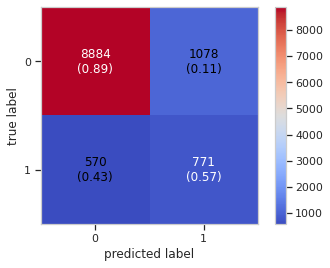

[[8684 1278]
 [ 375  966]]


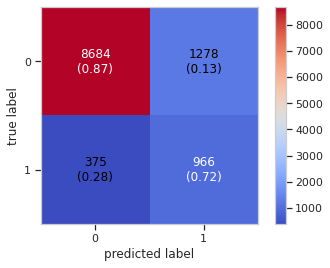

[[9083  879]
 [ 512  829]]


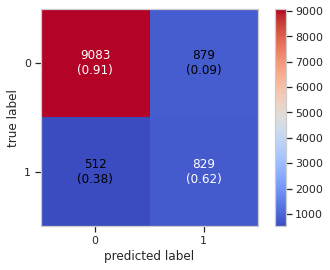

In [ ]:
# plot confusion matrix pca

from mlxtend.plotting import plot_confusion_matrix

for key in confusion_matrix_result: 
  print(confusion_matrix_result[key])
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_result[key],show_absolute=True,
                                show_normed=True,
                                colorbar=True, cmap="coolwarm")
  plt.savefig(f"charts/{key}_pca_cm.png", bbox_inches='tight')
  plt.show()



## NO PCA

In [ ]:
# Classification without PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    # "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier(),
}

params = {
    "LogisticRegression" : { "max_iter": [100,200]},
    "RandomForestClassifier": { "min_samples_split": [2,4,8], "n_estimators":[50,100] },
    # "LinearDiscriminantAnalysis" : { "solver":["svd" , "eigen"], "n_components":[1]},
"KNeighborsClassifier" : { "p": [1,2,3], "n_neighbors": [5,10,15]}
}

X_train_sf = X_train[selected_features_back].copy()
y_train_sf = np.array(y_train)[np.newaxis].T


helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train_sf, y_train_sf, scoring='f1', cv=5, n_jobs=3)

helper_score_summary = helper.score_summary(sort_by='mean_score')

for column in helper_score_summary:
  if column != "estimator":
    print(helper_score_summary[["estimator",column]])
    print("\n\n")




Running GridSearchCV for KNeighborsClassifier.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   24.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   52.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:  8.2min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    9.5s remaining:    4.1s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   11.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   39.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   58.5s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  1.6min


KNeighborsClassifier
LogisticRegression
RandomForestClassifier
                 estimator min_score
16  RandomForestClassifier  0.794126
14  RandomForestClassifier  0.788146
12  RandomForestClassifier  0.781277
11  RandomForestClassifier  0.780125
13  RandomForestClassifier  0.788467
15  RandomForestClassifier  0.794591
10      LogisticRegression   0.82222
0     KNeighborsClassifier  0.853069
9       LogisticRegression  0.814539
6     KNeighborsClassifier  0.835867
3     KNeighborsClassifier  0.835011
1     KNeighborsClassifier  0.816218
2     KNeighborsClassifier  0.801563
4     KNeighborsClassifier  0.804311
7     KNeighborsClassifier  0.800132
8     KNeighborsClassifier   0.79377
5     KNeighborsClassifier  0.791872



                 estimator mean_score
16  RandomForestClassifier   0.920127
14  RandomForestClassifier   0.920123
12  RandomForestClassifier   0.920111
11  RandomForestClassifier   0.919895
13  RandomForestClassifier   0.919709
15  RandomForestClassifier   0.919178
10

[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  2.4min finished


In [ ]:
# Confusion Matrix without PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(helper.grid_searches)

confusion_matrix_result = {}

best_classifiers = {}

best_classifiers["KNeighborsClassifier"] = KNeighborsClassifier(**helper.grid_searches["KNeighborsClassifier"].best_params_)
best_classifiers["LogisticRegression"] = LogisticRegression(**helper.grid_searches["LogisticRegression"].best_params_)
best_classifiers["RandomForestClassifier"] = RandomForestClassifier(**helper.grid_searches["RandomForestClassifier"].best_params_)

for key in best_classifiers:
  clf = best_classifiers[key].fit(X_train_sf, y_train_sf)
  y_test_pred = clf.predict(X_test[selected_features_back])

  print(f"CLASSIFIER: {key}")
  confusion_matrix_result[key] = confusion_matrix(y_test, y_test_pred)
  print(confusion_matrix_result[key])
  print(f"Accuracy score: {accuracy_score(y_test,y_test_pred)}")
  print(f"Precision score: {precision_score(y_test,y_test_pred)}")
  print(f"Recall score: {recall_score(y_test,y_test_pred)}")
  print(f"F1 score: {f1_score(y_test,y_test_pred)}")

  print("------------------------------------------------")


# y_pred = helper.grid_searches[key].best_estimator_.predict(X_sf)

# confusion_matrix[key] = confusion_matrix(y, y_pred)
# print(confusion_matrix[key])


{'KNeighborsClassifier': GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=3,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
             scoring='f1', verbose=10), 'LogisticRegression': GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
# plot confusion matrix without pca

from mlxtend.plotting import plot_confusion_matrix


for key in confusion_matrix_result: 
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_result[key],show_absolute=True,
                                show_normed=True,
                                colorbar=True, cmap="coolwarm")
  plt.savefig(f"charts/{key}_cm.png", bbox_inches='tight')
  plt.show()


